In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
test["Survived"] = np.nan
submissionIds = pd.DataFrame(test["PassengerId"])

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train,test)).reset_index(drop=True)

print("all_data siaze is:{}".format(all_data.shape))

all_data siaze is:(1309, 12)


In [5]:
#profile = ProfileReport(all_data, title="Titanic Data", explorative=True)

#profile.to_file("Titanic_Data_Profile.html")

In [6]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
all_data.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
all_data.describe(include='all')

Survived       Pclass                  Name   Sex          Age  \
count   891.000000  1309.000000                  1309  1309  1046.000000   
unique         NaN          NaN                  1307     2          NaN   
top            NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq           NaN          NaN                     2   843          NaN   
mean      0.383838     2.294882                   NaN   NaN    29.881138   
std       0.486592     0.837836                   NaN   NaN    14.413493   
min       0.000000     1.000000                   NaN   NaN     0.170000   
25%       0.000000     2.000000                   NaN   NaN    21.000000   
50%       0.000000     3.000000                   NaN   NaN    28.000000   
75%       1.000000     3.000000                   NaN   NaN    39.000000   
max       1.000000     3.000000                   NaN   NaN    80.000000   

              SibSp        Parch    Ticket         Fare        Cabin Embarked  
count   1309.000000  1309.000000      1309  1308.000000          295     1307  
unique          NaN          NaN       929          NaN          186        3  
top             NaN          NaN  CA. 2343          NaN  C23 C25 C27        S  
freq            NaN          NaN        11          NaN            6      914  
mean       0.498854     0.385027       NaN    33.295479          NaN      NaN  
std        1.041658     0.865560       NaN    51.758668          NaN      NaN  
min        0.000000     0.000000       NaN     0.000000          NaN      NaN  
25%        0.000000     0.000000       NaN     7.895800          NaN      NaN  
50%        0.000000     0.000000       NaN    14.454200          NaN      NaN  
75%        1.000000     0.000000       NaN    31.275000          NaN      NaN  
max        8.000000     9.000000       NaN   512.329200          NaN      NaN

In [9]:
#pd.options.display.float_format = "{:,.2f}".format

#all_data.head()

In [10]:
all_data[all_data['Embarked'].isnull()]

Survived  Pclass                                       Name     Sex  \
61        1.0       1                        Icard, Miss. Amelie  female   
829       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   38.0      0      0  113572  80.0   B28      NaN  
829  62.0      0      0  113572  80.0   B28      NaN

In [11]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Title  Survived
3     Mrs  0.793651
1    Miss  0.702703
0  Master  0.575000
4    Rare  0.347826
2      Mr  0.156673

&lt;seaborn.axisgrid.FacetGrid at 0x7fc4c4a984f0&gt;

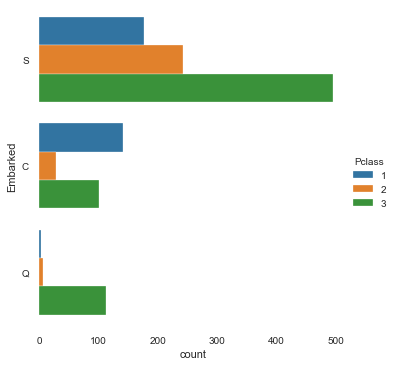

In [12]:
sns.catplot(y='Embarked', hue='Pclass', kind='count', data=all_data)

In [13]:
all_data.Embarked[all_data.Embarked.isnull() == True] = 'S'

In [14]:
all_data[all_data['Fare'].isnull()]

Survived  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
1043       NaN       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

      Fare Cabin Embarked Title  
1043   NaN   NaN        S    Mr

In [15]:
all_data[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

Pclass       Fare
0       1  87.508992
1       2  21.179196
2       3  13.302889

In [16]:
all_data.Fare[all_data.Fare.isnull()] = 13.30

Text(0, 0.5, &#39;# of Passengers&#39;)

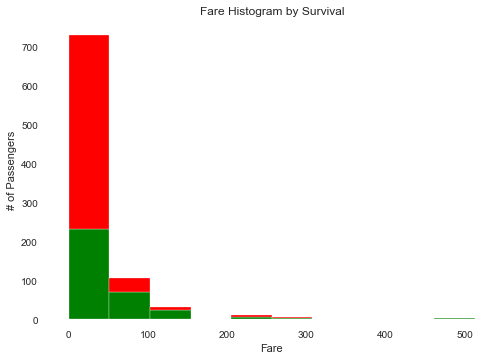

In [17]:
plt.hist(x = [all_data[all_data['Survived']==1]['Fare'],
        all_data[all_data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')


In [18]:
all_data.Ticket.value_counts()

CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
PC 17608         7
                ..
695              1
244346           1
C.A. 15185       1
2628             1
364506           1
Name: Ticket, Length: 929, dtype: int64

In [19]:
all_data['TicketsPerGroup'] = all_data.groupby(['Ticket'])['Fare'].transform('count')
all_data['FarePP'] = all_data['Fare'] / all_data['TicketsPerGroup']

all_data.drop(['TicketsPerGroup', 'Fare'], axis=1, inplace=True)

Text(0, 0.5, &#39;# of Passengers&#39;)

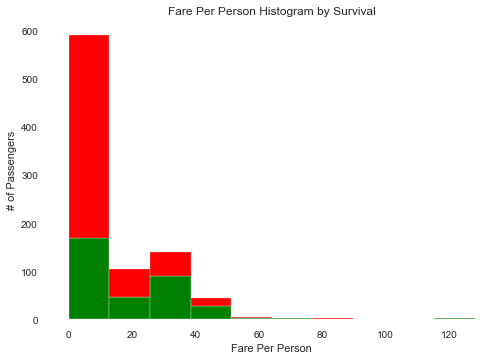

In [20]:
plt.hist(x = [all_data[all_data['Survived']==1]['FarePP'],
        all_data[all_data['Survived']==0]['FarePP']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Per Person Histogram by Survival')
plt.xlabel('Fare Per Person')
plt.ylabel('# of Passengers')

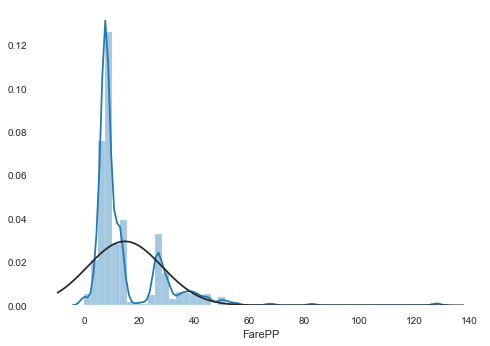

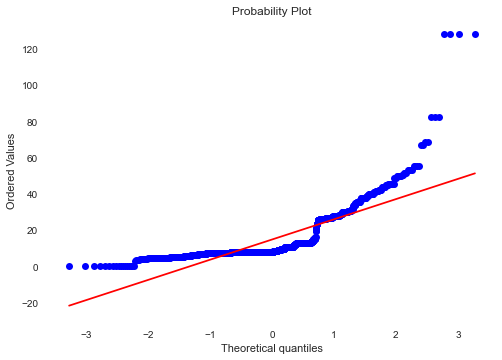

In [21]:
from scipy import stats
from scipy.stats import norm

#histogram and normal probability plot
sns.distplot(all_data['FarePP'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['FarePP'], plot=plt)

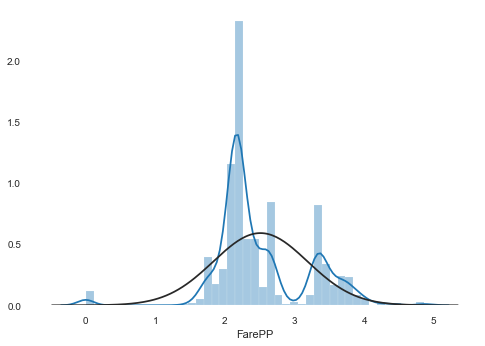

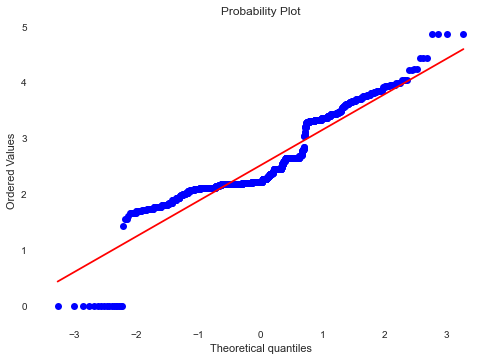

In [22]:
#applying log transformation
all_data['FarePP'] = np.log1p(all_data['FarePP'])

#histogram and normal probability plot
sns.distplot(all_data['FarePP'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['FarePP'], plot=plt)

In [23]:
all_data["Cabin"] = all_data.Cabin.str.extract('(^([A-Z]))', expand = False)

all_data.Cabin[all_data.Cabin.isnull() == True] = 'Unk'

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Cabin  Survived
3     D  0.757576
4     E  0.750000
1     B  0.744681
5     F  0.615385
2     C  0.593220
6     G  0.500000
0     A  0.466667
8   Unk  0.299854
7     T  0.000000

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4c5a967c0&gt;

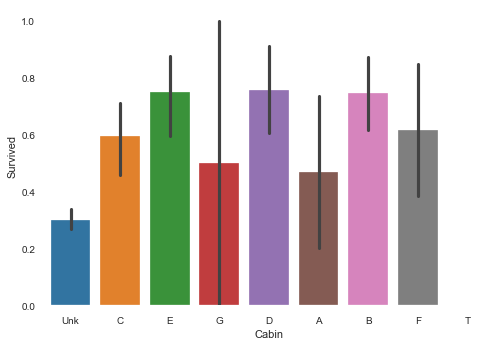

In [24]:
sns.barplot(all_data['Cabin'], all_data['Survived'])

all_data.drop('Cabin', axis=1, inplace=True)

In [25]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Title  Survived
3     Mrs  0.793651
1    Miss  0.702703
0  Master  0.575000
4    Rare  0.347826
2      Mr  0.156673

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4c5b2c400&gt;

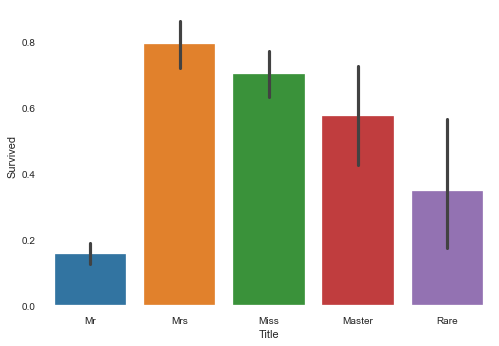

In [26]:
sns.barplot(all_data['Title'], all_data['Survived'])

In [27]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

Sex  Survived
1    male  0.188908
0  female  0.742038

In [28]:
all_data["Surname"] = all_data.Name.str.extract('([A-Za-z]+)\,', expand = False)
all_data['Surname'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Gracie        1
Daniels       1
Badman        1
Kvillner      1
Rosenbaum     1
Name: Surname, Length: 872, dtype: int64

In [29]:
all_data['FamilyGroupID'] = all_data.agg(lambda x: f"{x['Surname']}-{x['Pclass']}-{x['Embarked']}-{x['Ticket']}", axis=1)

all_data.FamilyGroupID.value_counts()

Sage-3-S-CA. 2343         11
Goodwin-3-S-CA 2144        8
Andersson-3-S-347082       7
Asplund-3-S-347077         7
Skoog-3-S-347088           6
                          ..
Murdlin-3-S-A./5. 3235     1
Dorking-3-S-A/5. 10482     1
Clifford-1-S-110465        1
Connolly-3-Q-330972        1
Spector-3-S-A.5. 3236      1
Name: FamilyGroupID, Length: 1024, dtype: int64

In [30]:
all_data[all_data['FamilyGroupID']=='Goodwin-3-S-CA 2144']

Survived  Pclass                                     Name     Sex   Age  \
59         0.0       3       Goodwin, Master. William Frederick    male  11.0   
71         0.0       3               Goodwin, Miss. Lillian Amy  female  16.0   
386        0.0       3          Goodwin, Master. Sidney Leonard    male   1.0   
480        0.0       3           Goodwin, Master. Harold Victor    male   9.0   
678        0.0       3  Goodwin, Mrs. Frederick (Augusta Tyler)  female  43.0   
683        0.0       3              Goodwin, Mr. Charles Edward    male  14.0   
1030       NaN       3           Goodwin, Mr. Charles Frederick    male  40.0   
1031       NaN       3              Goodwin, Miss. Jessie Allis  female  10.0   

      SibSp  Parch   Ticket Cabin Embarked   Title    FarePP  Surname  \
59        5      2  CA 2144   Unk        S  Master  1.926072  Goodwin   
71        5      2  CA 2144   Unk        S    Miss  1.926072  Goodwin   
386       5      2  CA 2144   Unk        S  Master  1.926072  Goodwin   
480       5      2  CA 2144   Unk        S  Master  1.926072  Goodwin   
678       1      6  CA 2144   Unk        S     Mrs  1.926072  Goodwin   
683       5      2  CA 2144   Unk        S      Mr  1.926072  Goodwin   
1030      1      6  CA 2144   Unk        S      Mr  1.926072  Goodwin   
1031      5      2  CA 2144   Unk        S    Miss  1.926072  Goodwin   

            FamilyGroupID  
59    Goodwin-3-S-CA 2144  
71    Goodwin-3-S-CA 2144  
386   Goodwin-3-S-CA 2144  
480   Goodwin-3-S-CA 2144  
678   Goodwin-3-S-CA 2144  
683   Goodwin-3-S-CA 2144  
1030  Goodwin-3-S-CA 2144  
1031  Goodwin-3-S-CA 2144

In [31]:
all_data['FamilySize'] = all_data.groupby(['FamilyGroupID'])['Surname'].transform('count')

In [32]:
all_data.drop(['SibSp', 'Parch', 'Surname', 'FamilyGroupID', 'Ticket', 'Name'], axis=1, inplace=True)

In [33]:
all_data['WandCGroup'] = 0 # add a class column with 0 as default value

# find all rows that fulfills your conditions and set class to 1
all_data.loc[(all_data['Sex'] == 'female') & (all_data['FamilySize'] > 1), 'WandCGroup'] = 1 # then set class to 1

all_data.loc[(all_data['Title'] == 'Master') & (all_data['FamilySize'] > 1), 'WandCGroup'] = 1

all_data[['WandCGroup', 'Survived']].groupby(['WandCGroup'], as_index=False).mean().sort_values(by='WandCGroup', ascending=False)

WandCGroup  Survived
1           1  0.678049
0           0  0.295918

In [34]:
all_data['IsMarried'] = 0 # add a class column with 0 as default value

# find all rows that fulfills your conditions and set class to 1
all_data.loc[(all_data['Title'] == 'Mrs') & (all_data['FamilySize'] > 1), 'IsMarried'] = 1 # then set class to 1

all_data[['IsMarried', 'Survived']].groupby(['IsMarried'], as_index=False).mean().sort_values(by='IsMarried', ascending=False)

IsMarried  Survived
1          1  0.762887
0          0  0.337531

In [35]:
all_data['IsAlone'] = np.where(all_data['FamilySize'] == 1, 1, 0)

all_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='IsAlone', ascending=False)

IsAlone  Survived
1        1  0.317158
0        0  0.506369

In [36]:
all_data['IsChild'] = 0 # add a class column with 0 as default value

# find all rows that fulfills your conditions and set class to 1
all_data.loc[(all_data['FamilySize'] > 1) & (all_data['WandCGroup'] == 1) & (all_data['Title'] != 'Mrs'), 'IsChild'] = 1 # then set class to 1

all_data[['IsChild', 'Survived']].groupby(['IsChild'], as_index=False).mean().sort_values(by='IsChild', ascending=False)

IsChild  Survived
1        1  0.601852
0        0  0.353768

In [37]:
all_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

FamilySize  Survived
8          11  0.000000
7           8  0.000000
6           7  0.272727
5           6  0.095238
4           5  0.142857
3           4  0.720000
2           3  0.653333
1           2  0.548387
0           1  0.317158

In [38]:
all_data.describe(include='all')

Survived       Pclass   Sex          Age Cabin Embarked Title  \
count   891.000000  1309.000000  1309  1046.000000  1309     1309  1309   
unique         NaN          NaN     2          NaN     9        3     5   
top            NaN          NaN  male          NaN   Unk        S    Mr   
freq           NaN          NaN   843          NaN  1014      916   757   
mean      0.383838     2.294882   NaN    29.881138   NaN      NaN   NaN   
std       0.486592     0.837836   NaN    14.413493   NaN      NaN   NaN   
min       0.000000     1.000000   NaN     0.170000   NaN      NaN   NaN   
25%       0.000000     2.000000   NaN    21.000000   NaN      NaN   NaN   
50%       0.000000     3.000000   NaN    28.000000   NaN      NaN   NaN   
75%       1.000000     3.000000   NaN    39.000000   NaN      NaN   NaN   
max       1.000000     3.000000   NaN    80.000000   NaN      NaN   NaN   

             FarePP   FamilySize   WandCGroup    IsMarried      IsAlone  \
count   1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       2.509713     1.779221     0.228419     0.113063     0.647823   
std        0.676863     1.548205     0.419974     0.316791     0.477831   
min        0.000000     1.000000     0.000000     0.000000     0.000000   
25%        2.145931     1.000000     0.000000     0.000000     0.000000   
50%        2.202765     1.000000     0.000000     0.000000     1.000000   
75%        2.772589     2.000000     0.000000     0.000000     1.000000   
max        4.860450    11.000000     1.000000     1.000000     1.000000   

            IsChild  
count   1309.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.115355  
std        0.319572  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [39]:
all_data = MultiColumnLabelEncoder(columns=['Sex']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['Pclass', 'Title', 'Embarked', 'Cabin'])

all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1046 non-null   float64
 3   FarePP        1309 non-null   float64
 4   FamilySize    1309 non-null   int64  
 5   WandCGroup    1309 non-null   int64  
 6   IsMarried     1309 non-null   int64  
 7   IsAlone       1309 non-null   int64  
 8   IsChild       1309 non-null   int64  
 9   Pclass_1      1309 non-null   uint8  
 10  Pclass_2      1309 non-null   uint8  
 11  Pclass_3      1309 non-null   uint8  
 12  Title_Master  1309 non-null   uint8  
 13  Title_Miss    1309 non-null   uint8  
 14  Title_Mr      1309 non-null   uint8  
 15  Title_Mrs     1309 non-null   uint8  
 16  Title_Rare    1309 non-null   uint8  
 17  Embarked_C    1309 non-null   uint8  
 18  Embarked_Q    

&lt;matplotlib.legend.Legend at 0x7fc4c4dfc490&gt;

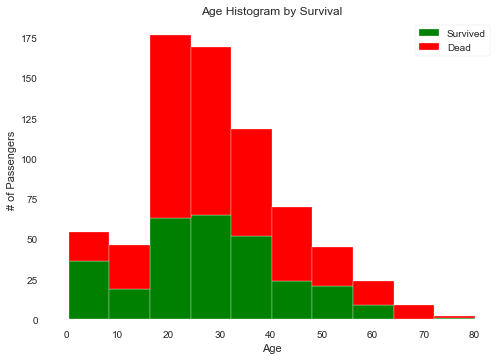

In [40]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4bc2c2550&gt;

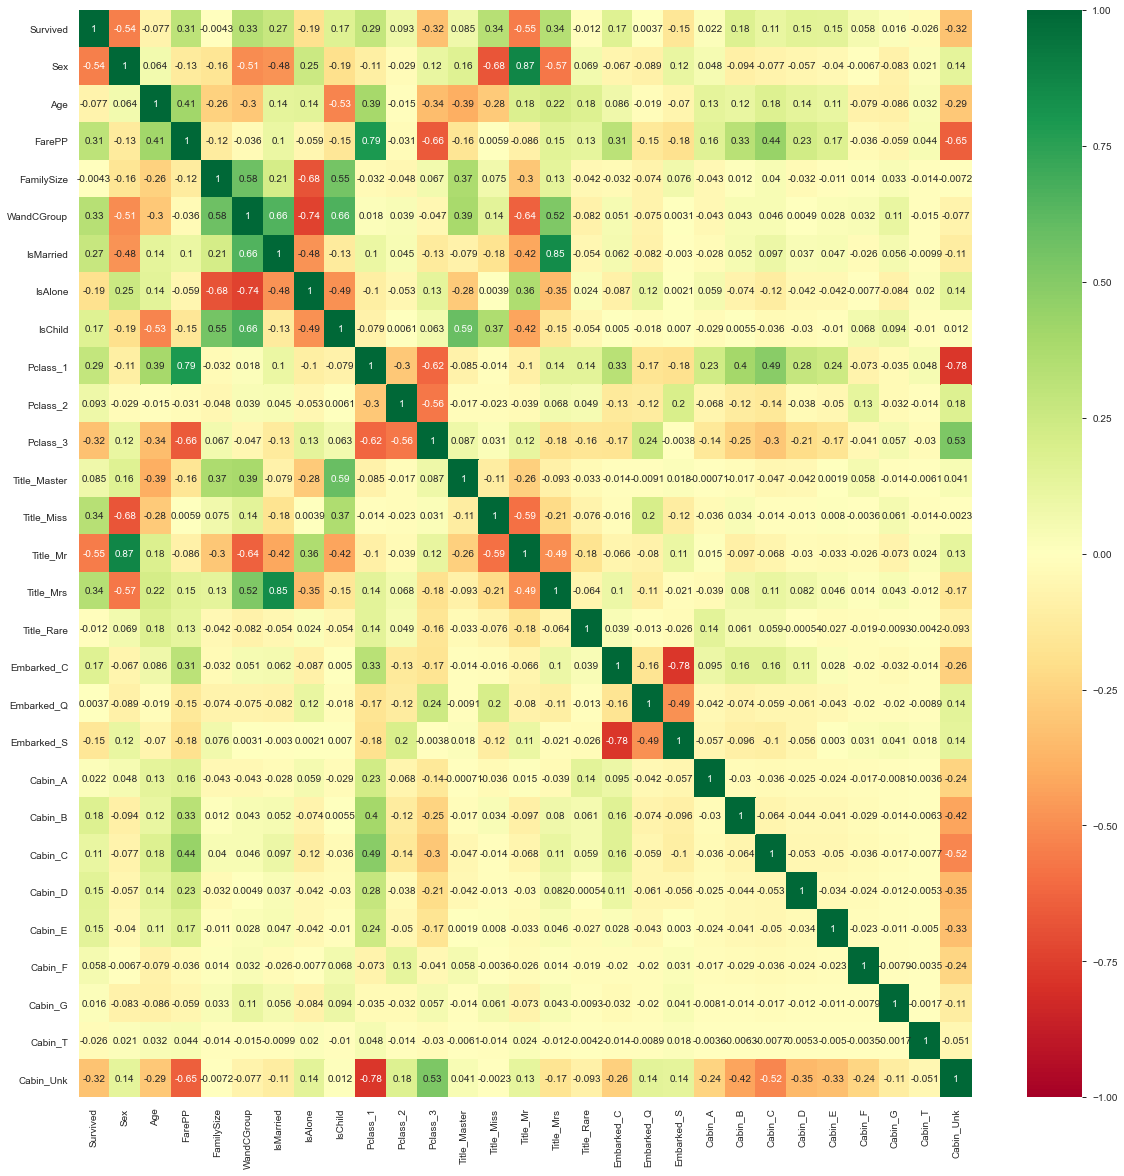

In [41]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [42]:
all_data_age = all_data.copy()

all_data_WithAge = all_data_age[pd.isnull(all_data_age['Age']) == False]
all_data_WithoutAge = all_data_age[pd.isnull(all_data_age['Age'])]

In [43]:
from sklearn.ensemble import RandomForestRegressor

use_Arguments = ['FarePP', 'FamilySize','WandCGroup', 'IsMarried', 'IsAlone', 'IsChild', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

rfModel_age = RandomForestRegressor(random_state=42)

rfModel_age.fit (all_data_WithAge[use_Arguments], all_data_WithAge['Age'])

age_Values = rfModel_age.predict(X = all_data_WithoutAge[use_Arguments])

print(age_Values)

[27.527      31.49027996 40.00961538 27.25699892 21.5637619  27.90144002
 50.18       27.77902155 24.2836798  27.90144002 29.4044444  38.85653225
 27.77902155 25.17434768 38.4895     36.06558333  6.52391667 27.90144002
 29.4044444  24.39466991 29.4044444  29.4044444  27.90144002 27.36796648
 15.52176667 29.4044444  36.21085595  3.9746     29.2        28.84721967
 24.78568536 11.5646     50.78507143 50.44341955  5.75737915 14.36815
 32.208      49.14666667 32.05049495 36.21085595 27.77902155 33.67366667
 36.21085595 27.90144002  6.49517857 21.88       15.18796667 13.57676667
 29.44220452 54.77966667 36.21085595 27.77902155 32.148      27.77902155
 37.75825144 44.64585365 36.06558333 41.86361111 27.77902155 37.22719891
 31.92898637 29.4044444  29.82       33.67366667  4.905      41.47
 27.90144002 23.35935714 57.68916667 27.25699892 21.5637619  21.5637619
 38.85653225 30.46666667 27.77902155 29.29       27.90144002 26.82214935
  6.49517857 27.90144002 27.585      37.75825144 28.54138045 

In [44]:
all_data_WithoutAge['Age'] = age_Values.astype(float)

all_data.update(all_data_WithoutAge['Age'])

all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   FarePP        1309 non-null   float64
 4   FamilySize    1309 non-null   int64  
 5   WandCGroup    1309 non-null   int64  
 6   IsMarried     1309 non-null   int64  
 7   IsAlone       1309 non-null   int64  
 8   IsChild       1309 non-null   int64  
 9   Pclass_1      1309 non-null   uint8  
 10  Pclass_2      1309 non-null   uint8  
 11  Pclass_3      1309 non-null   uint8  
 12  Title_Master  1309 non-null   uint8  
 13  Title_Miss    1309 non-null   uint8  
 14  Title_Mr      1309 non-null   uint8  
 15  Title_Mrs     1309 non-null   uint8  
 16  Title_Rare    1309 non-null   uint8  
 17  Embarked_C    1309 non-null   uint8  
 18  Embarked_Q    

&lt;matplotlib.legend.Legend at 0x7fc4c5b2c220&gt;

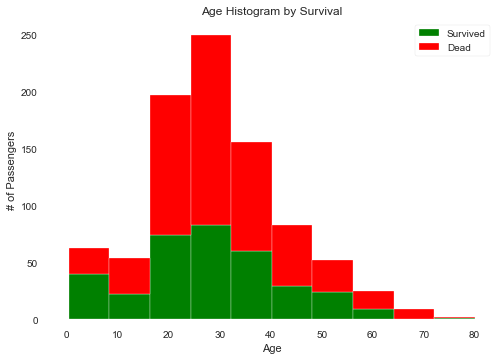

In [45]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

In [46]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 5)

all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (0.0902, 16.136]  0.529915
1  (16.136, 32.102]  0.352809
2  (32.102, 48.068]  0.369295
3  (48.068, 64.034]  0.428571
4    (64.034, 80.0]  0.090909

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4c4eb3a90&gt;

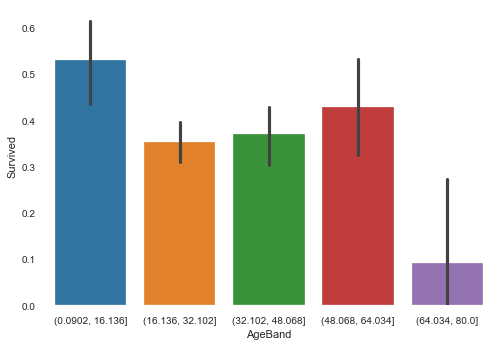

In [47]:
sns.barplot(all_data['AgeBand'], all_data['Survived'])

In [48]:
all_data = MultiColumnLabelEncoder(columns=['AgeBand']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['AgeBand'])

all_data.drop(['Age'], axis=1, inplace=True)

&lt;matplotlib.legend.Legend at 0x7fc4c7dbbc40&gt;

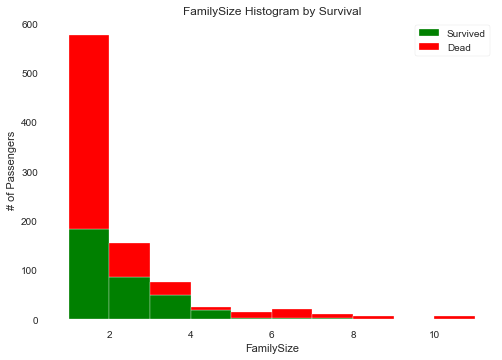

In [49]:
plt.hist(x = [all_data[all_data['Survived']==1]['FamilySize'],
        all_data[all_data['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()

In [50]:
all_data['FamilyBand'] = pd.cut(all_data['FamilySize'], 6)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

FamilyBand  Survived
0   (0.99, 2.667]  0.366120
1  (2.667, 4.333]  0.670000
2    (4.333, 6.0]  0.114286
3    (6.0, 7.667]  0.272727
4  (7.667, 9.333]  0.000000
5   (9.333, 11.0]  0.000000

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4c7d77760&gt;

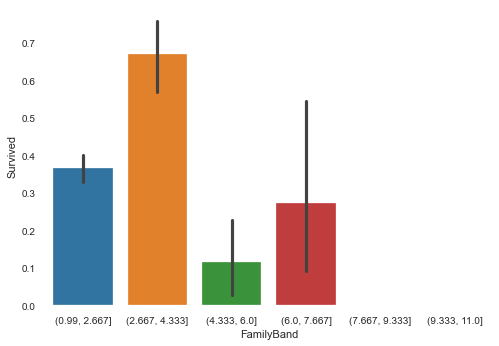

In [51]:
sns.barplot(all_data['FamilyBand'], all_data['Survived'])

In [52]:
all_data = MultiColumnLabelEncoder(columns=['FamilyBand']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['FamilyBand'])

all_data.drop(['FamilySize'], axis=1, inplace=True)

In [53]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   FarePP        1309 non-null   float64
 3   WandCGroup    1309 non-null   int64  
 4   IsMarried     1309 non-null   int64  
 5   IsAlone       1309 non-null   int64  
 6   IsChild       1309 non-null   int64  
 7   Pclass_1      1309 non-null   uint8  
 8   Pclass_2      1309 non-null   uint8  
 9   Pclass_3      1309 non-null   uint8  
 10  Title_Master  1309 non-null   uint8  
 11  Title_Miss    1309 non-null   uint8  
 12  Title_Mr      1309 non-null   uint8  
 13  Title_Mrs     1309 non-null   uint8  
 14  Title_Rare    1309 non-null   uint8  
 15  Embarked_C    1309 non-null   uint8  
 16  Embarked_Q    1309 non-null   uint8  
 17  Embarked_S    1309 non-null   uint8  
 18  Cabin_A       

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4c7d4f730&gt;

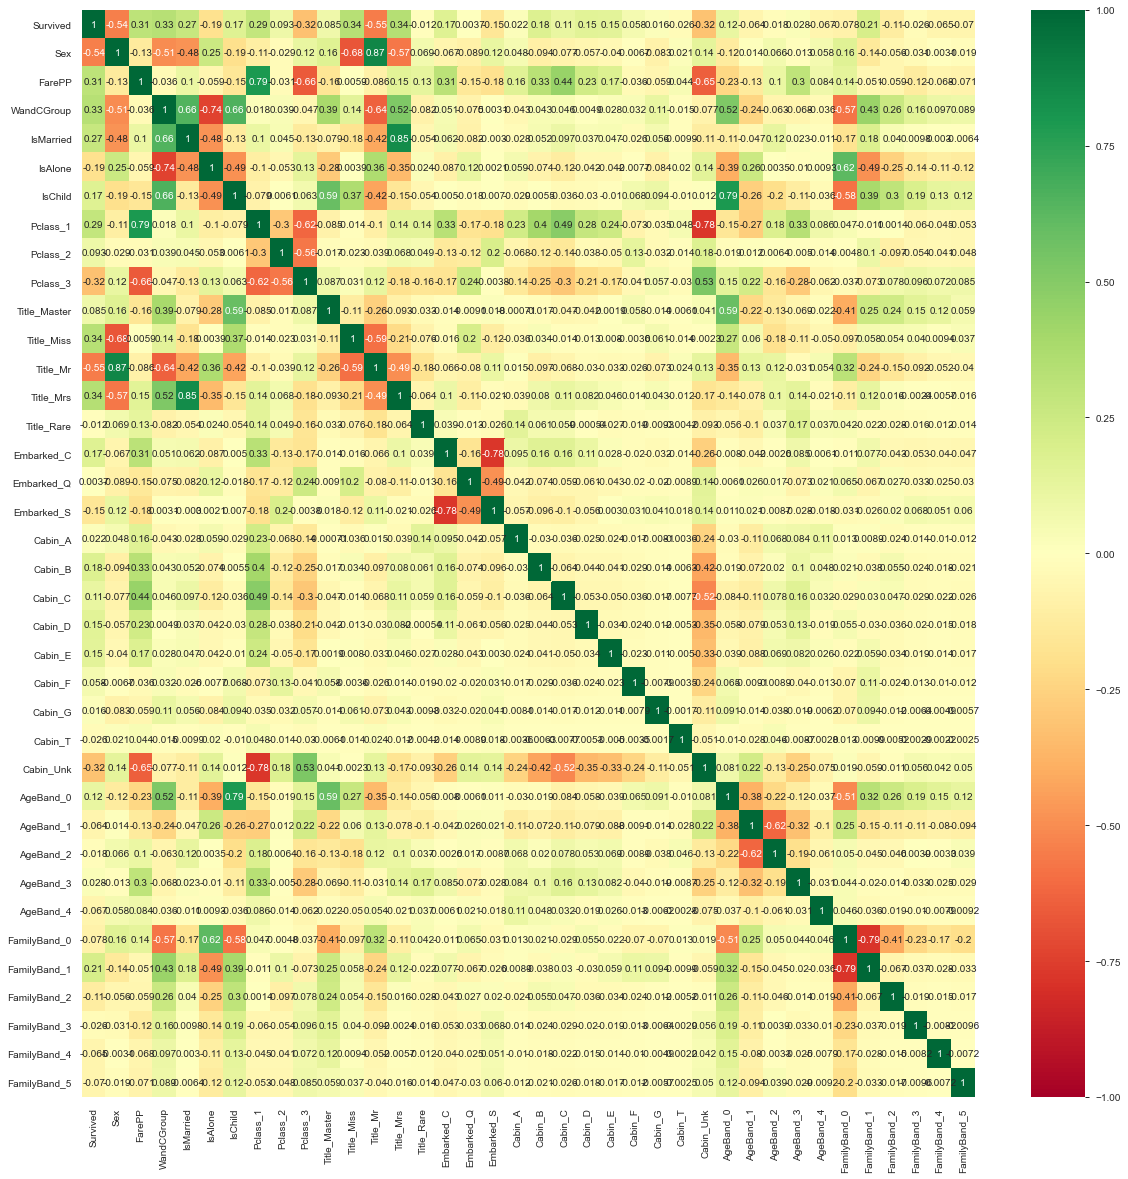

In [54]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

all_data.drop(['Age','Sex'], axis=1, inplace=True)


In [55]:
train = all_data[:ntrain]
test = all_data[ntrain:]

test.drop(['Survived'], axis=1, inplace=True)

In [56]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scale data
#scaler = StandardScaler().fit(test)
#scaler = MinMaxScaler().fit(test)
#scaled_test = scaler.transform(test)

#imputed_test = pd.DataFrame(scaled_test)
#imputed_test.columns = test.columns


#Scale data
#scaler = StandardScaler().fit(train)
#scaler = MinMaxScaler().fit(train)
#scaled_train = scaler.transform(train)

#imputed_train = pd.DataFrame(scaled_train)
#imputed_train.columns = train.columns

y = train.Survived

#imputed_train.drop(['Survived'], axis=1, inplace=True)

X = train.drop(['Survived'], 1)

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

           Specs       Score
11      Title_Mr  112.805785
0            Sex   92.702447
12     Title_Mrs   89.474177
10    Title_Miss   79.531749
2     WandCGroup   75.028601
3      IsMarried   58.927444
6       Pclass_1   55.175151
8       Pclass_3   41.553071
32  FamilyBand_1   34.624198
18       Cabin_B   25.875581
5        IsChild   21.704379
25     Cabin_Unk   20.488314
14    Embarked_C   20.464401
20       Cabin_D   19.489646
21       Cabin_E   18.140638
1         FarePP   16.081639
19       Cabin_C   10.936730
4        IsAlone   10.847576
33  FamilyBand_2   10.752570
26     AgeBand_0   10.556050


In [59]:
#use_features = ['Title_Mr', 'Sex', 'Title_Mrs', 'Title_Miss', 'SmallFamily', 'Pclass_1', 'Pclass_3', 'Cabin_B',
#                'Cabin_Unk', 'Embarked_C', 'Cabin_D', 'Cabin_E', 'IsAlone', 'LargeFamily', 'LargeFamily', 'Cabin_C', 'IsChild']
#X = X[use_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.25)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4aac31d90&gt;

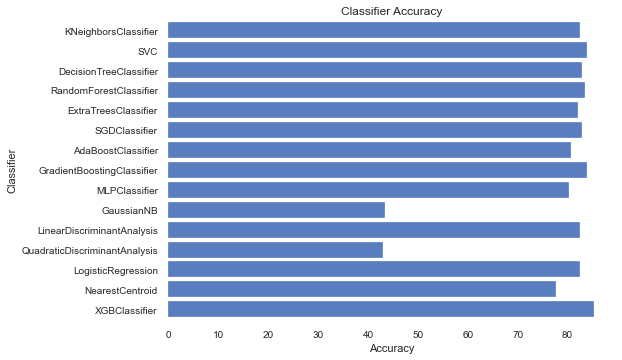

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='auto'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    SGDClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(max_iter = 1000, random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42),
    NearestCentroid(),
    XGBClassifier(objective="binary:logistic", random_state=42)
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(val_X)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] * 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [61]:
log.groupby(['Classifier'], as_index=False).mean().sort_values(by='Accuracy', ascending=False)

Classifier   Accuracy
14                  XGBClassifier  85.201794
4      GradientBoostingClassifier  83.856502
13                            SVC  83.856502
11         RandomForestClassifier  83.408072
1          DecisionTreeClassifier  82.959641
12                  SGDClassifier  82.959641
5            KNeighborsClassifier  82.511211
6      LinearDiscriminantAnalysis  82.511211
7              LogisticRegression  82.511211
2            ExtraTreesClassifier  82.062780
0              AdaBoostClassifier  80.717489
8                   MLPClassifier  80.269058
9                 NearestCentroid  77.578475
3                      GaussianNB  43.497758
10  QuadraticDiscriminantAnalysis  43.049327

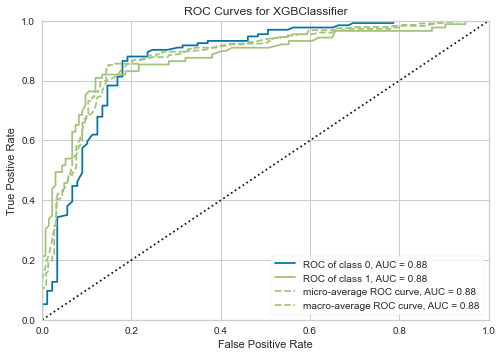

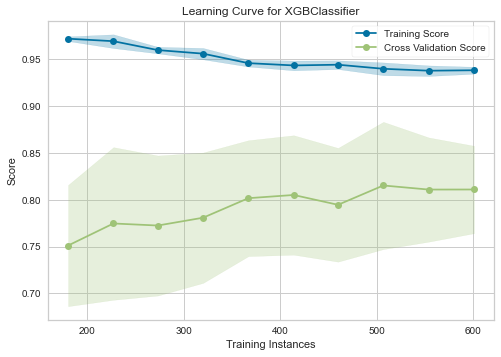

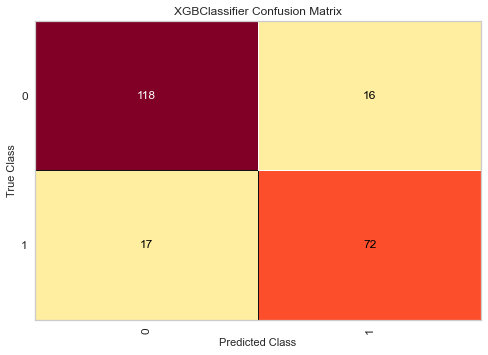

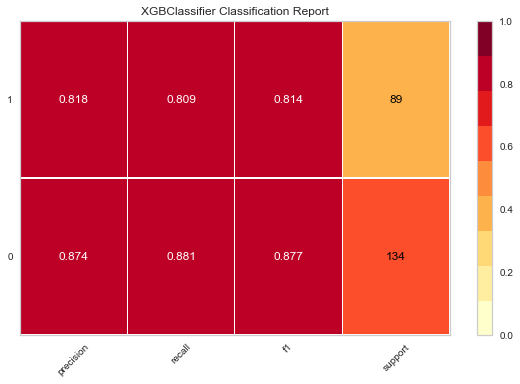

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4aa2c62e0&gt;

In [63]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

classes = ["0", "1"]

model = XGBClassifier(objective="binary:logistic", random_state=42)

#ROCAUC
#roc_auc(model, train_X, train_y, X_test=val_X, y_test=val_y, classes=classes)
roc_auc(model, train_X, train_y, val_X, val_y, classes=classes)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Instantiate confusion matrix
confusion_matrix(
    model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(val_X, val_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

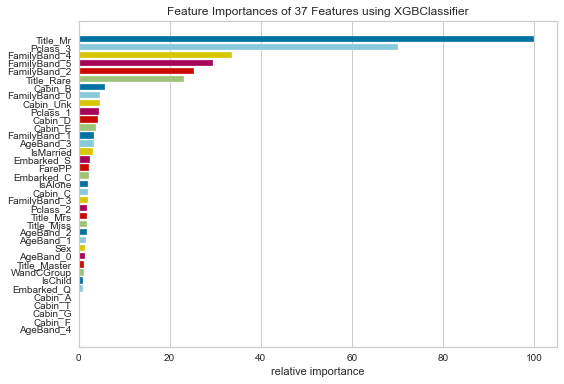

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4aaca6a30&gt;

In [64]:
#Model Feature Importance
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [65]:
pred = visualizer.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       135
         1.0       0.81      0.82      0.81        88

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223



XGBoost Tuning Code

In [66]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=cv, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Model with rank: 1
Mean validation score: 0.845 (std: 0.034)
Parameters: {&#39;colsample_bytree&#39;: 0.7526113835870348, &#39;gamma&#39;: 0.4572059729624799, &#39;learning_rate&#39;: 0.15563115746762193, &#39;max_depth&#39;: 5, &#39;n_estimators&#39;: 145, &#39;subsample&#39;: 0.618786386710022}

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.8min finished


In [69]:
model = XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.75, gamma= 0.46, learning_rate= 0.15, max_depth= 5, n_estimators= 145, subsample= 0.62)

model.fit(train_X, train_y,early_stopping_rounds=100, eval_set=[(val_X, val_y)])

xgb_prediction = model.predict(val_X)

print(classification_report(xgb_prediction, val_y))

[0]	validation_0-error:0.23318
Will train until validation_0-error hasn&#39;t improved in 100 rounds.
[1]	validation_0-error:0.18834
[2]	validation_0-error:0.19731
[3]	validation_0-error:0.18386
[4]	validation_0-error:0.17040
[5]	validation_0-error:0.16592
[6]	validation_0-error:0.16592
[7]	validation_0-error:0.17040
[8]	validation_0-error:0.17489
[9]	validation_0-error:0.17489
[10]	validation_0-error:0.16143
[11]	validation_0-error:0.16592
[12]	validation_0-error:0.17040
[13]	validation_0-error:0.16592
[14]	validation_0-error:0.17040
[15]	validation_0-error:0.16143
[16]	validation_0-error:0.15695
[17]	validation_0-error:0.15695
[18]	validation_0-error:0.16592
[19]	validation_0-error:0.16592
[20]	validation_0-error:0.15695
[21]	validation_0-error:0.15695
[22]	validation_0-error:0.15695
[23]	validation_0-error:0.15695
[24]	validation_0-error:0.15695
[25]	validation_0-error:0.15695
[26]	validation_0-error:0.15695
[27]	validation_0-error:0.15695
[28]	validation_0-error:0.15695
[29]	valida

In [70]:
final_model=model

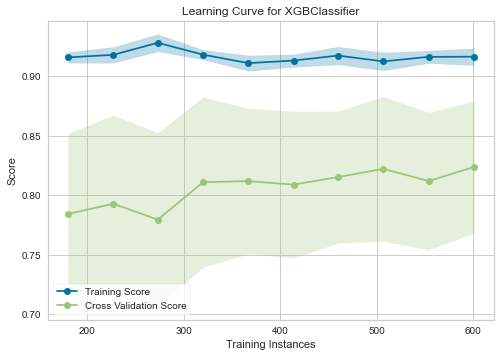

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fc4a85509d0&gt;

In [71]:
#Instantiate visualizer
vis = LearningCurve(
    final_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

vis.fit(train_X, train_y)        #Fit the data to the visualizer
vis.show()           #Finalize and render the figure

In [72]:
pred = final_model.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       133
         1.0       0.84      0.83      0.84        90

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



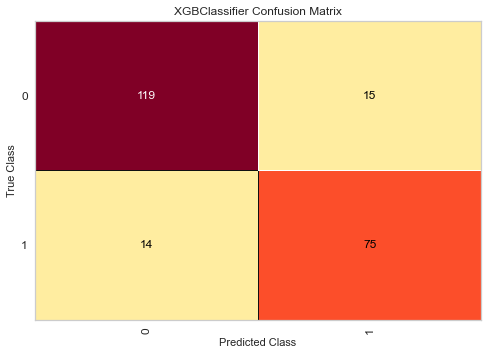

&lt;Figure size 576x396 with 0 Axes&gt;

In [73]:
#Instantiate confusion matrix
confusion_matrix(
    final_model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [74]:
pred = final_model.predict(test)

submission = pd.DataFrame({'PassengerId':submissionIds['PassengerId'], 'Survived':pred})

submission['PassengerId'] = submission['PassengerId'].astype('int')
submission['Survived'] = submission['Survived'].astype('int')

filename = 'Titanic Prediction.csv'

submission.to_csv(filename, index=False)

In [75]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model, random_state=42).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

&lt;IPython.core.display.HTML object&gt;

In [76]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(val_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[4,:], val_X.iloc[4,:])

&lt;IPython.core.display.HTML object&gt;

&lt;shap.plots._force.AdditiveForceVisualizer at 0x7fc4b3f76f10&gt;

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [ ]:
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
model.add(Dropout(0.50))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=300)

In [ ]:
pred = model.predict_classes(val_X)
print(metrics.accuracy_score(val_y, pred))

In [ ]:
print(classification_report(pred, val_y))

In [ ]:
history=model.fit(train_X, train_y, validation_split=0.25, epochs=300, batch_size=32, verbose=0)

print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [ ]:
pred = model.predict_classes(test)

submission['PassengerId'] = submissionIds['PassengerId'].astype('int')
submission['Survived'] = pred.astype('int')

filename = 'Titanic Prediction TF.csv'

submission.to_csv(filename, index=False)